# ចំណាត់ថ្នាក់២ក្រុម (Binary Classification)

ក្រៅពីការសិក្សាពីទំនាក់ទំនងរវាងអថេរពីរឬច្រើនតាមរយៈម៉ូឌែលតម្រែតម្រង់ ការបែងចែកទិន្នន័យដោយផ្នែកលើអថេរពន្យល់របស់វាជាក្រុមហៅថាចំណាត់ថ្នាក់ក្រុម(classification)។ តាមពិតចំណាត់ថ្នាក់ក្រុម ក៏អាចបង្ហាញបានជាទម្រង់ម៉ូឌែលតម្រែតម្រង់ផងដែរ ដោយគ្រាន់តែតម្លៃនៃអថេរគោលដៅមិនយកតម្លៃទូលាយលើសំណុំចំនួនពិតឡើយ ផ្ទុយទៅវិញគឺយកតម្លៃដាច់ដូចជា{0,1}ជាដើម។

ក្នុងអត្ថបទនេះយើងនឹងណែនាំករណីដែលអថេរគោលដៅយកតម្លៃតែពីរប្រភេទដែលយើងកំណត់ហៅថាចំណាត់ថ្នាក់២ក្រុម(binary classification)។ ឧទាហរណ៍នៃការអនុវត្តចំណាត់ថ្នាក់២ក្រុមក្នុងជីវភាពមានដូចជា៖ ការកំណត់អត្តសញ្ញាណសារអេឡិចត្រូនិចរំខាន(spam or not) ការវិភាគជម្ងឺតាមរយៈរោគសញ្ញា(មានជម្ងឺឬគ្មាន) ការទស្សន៍ទាយលទ្ធផលបោះឆ្នោត(ជាប់ឬធ្លាក់)ជាដើម។

ជាឧទាហរណ៍យើងនឹងលើកយកការកំណត់អត្តសញ្ញាណសារអេឡិចត្រូនិចរំខាន(spam or not)មកបង្ហាញដើម្បីស្វែងយល់បន្ថែមពីដំណោះស្រាយក្នុងបញ្ហាចំណាត់ថ្នាក់ក្រុមតាមរយៈ machine learning ។ រូបទី១បង្ហាញពីដំណើរការនៃការកំណត់សាររំខាន។

![spam](/images/spam-example.png)


ជាដំណោះស្រាយងាយបំផុតដែលអ្នកអាចប្រហែលជានឹងនឹកឃើញមុនគេគឺការកំណត់រកនូវពាក្យដែលច្រើនប្រើប្រាស់ក្នុងspam mail។ 
ជាឧទាហរណ៍យើងអាចកំណត់ដូចទម្រង់ខាងក្រោម។

In [1]:
def checkSpam(text):
    if text.find('search for friend') != -1:
        return True
    if text.find('check my attached file for more photos') != -1:
        return True 
    if text.find('Hey honey') != -1:
        return True
    # and many conditions
    # and many many conditions 
    # .....
    return False

In [2]:
checkSpam('I am Mariya. I search for friend. Check my profile here!')

True

In [3]:
checkSpam('Please submit your abstract before 1st March')

False

ដូចដែលអ្នកអាចកត់សម្គាល់បាន ការកំណត់លក្ខខណ្ឌបែបនេះទាមទារពេលវេលានិងកម្លាំងច្រើនក្នុងការកំណត់យកពាក្យដែលសមស្រប។​ម្យ៉ាងទៀតវាមិនមានភាពបត់បែនខ្ពស់នោះឡើយ។ ជាដំណោះស្រាយយើងនឹងណែនាំអំពីវិធីសាស្រ្តធ្វើចំណាត់ថ្នាក់ក្រុមដោយប្រើMachine Learning។ នៅទីនេះធាតុចូលគឺជាអត្ថបទសាររីឯលទ្ធផលគឺជាការសន្និដ្ឋានថាតើជាspam mailឬយ៉ាងណា។ 

## ចំណាត់ថ្នាក់២ក្រុមដោយម៉ូឌែលលីនេអ៊ែរ

ម៉ូឌែលលីនេអ៊ែរនៃចំណាត់ថ្នាក់២ក្រុមគឺជាម៉ូឌែលដែលទស្សន៍ទាយប្រភេទនៃទិន្នន័យ
$\hat{y}\in\left\{0,1\right\}$ដោយកំណត់តាមតម្លៃវិជ្ជមានឬអវិជ្ជមាននៃផលគុណស្កាលែរវាងធាតុចូល(input)$\pmb{x}\in\mathbb{R}^d $ និងប៉ារ៉ាម៉ែត្រម៉ូឌែល$\pmb{w}\in\mathbb{R}^d $។

$$
\hat{y}=\left\{\begin{matrix}
1 & \pmb{x}^{\top}\pmb{w}>0\\ 
0 & \pmb{x}^{\top}\pmb{w}\leq 0
\end{matrix}\right.
$$

ក្នុងករណីការកំណត់spam mail យើងអាចកំណត់ជាទម្រង់ម៉ូឌែលលីនេអ៊ែរខាងលើបានដោយកំណត់យក \hat{y}=1 សម្គាល់spam mail និង \hat{y}=0សម្គាល់សារធម្មតា។ 
ដើម្បីងាយស្រួលយល់ពីម៉ូឌែលនេះ យើងមកមើលឧទាហរណ៍ងាយមួយក្នុងការកំណត់spam mailដូចខាងក្រោម។ 

សន្មតថា វ៉ិចទ័រធាតុចូល(អត្ថបទសារ)មានវិមាត្រ10។ យើងកំណត់វ៉ិចទ័រនេះបង្ហាញពីវត្តមាននៃពាក្យគន្លឹះចំនួន១០ ដោយយកតម្លៃ0 ឬ 1 ត្រង់ពាក្យគន្លឹះនិមួយៗប្រសិនបើពាក្យគន្លឹះនោះគ្មានឬមានវត្តមានក្នុងអត្ថបទសារ។ 

ឧទាហរណ៍ ពាក្យគន្លឹះដែលរៀបចំទុកមាន “assignment”, “boy”, “file”, “hello”, “love”, “my”, “photo”, “password”, “school” , “text”។ ក្នុងករណីនេះ អត្ថបទសារ “Hello my boy, I sent you my photo in the attached file” អាចបង្ហាញជាទម្រង់វ៉ិចទ័រ $\pmb{x}\in\mathbb{R}^d$ បានដូចខាងក្រោម 

$$
\pmb{x}=\left(\begin{matrix}\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}1&1\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}0&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)^\top
$$

ចំពោះការប៉ាន់ស្មានដោយម៉ូឌែលលីនេអ៊ែរខាងលើ ចំពោះប៉ារ៉ាម៉ែត្រ$\pmb{w}=\left(\begin{matrix}w_1&\cdots&w_{10}\\\end{matrix}\right)^\top $ ផលគុណស្កាលែក្នុងករណីអត្ថបទសារខាងលើត្រូវបានគណនាដូចខាងក្រោម។ក្នុងករណីនេះប្រសិនបើតម្លៃផលគុណស្កាលែនេះវិជ្ជមាននោះ អត្ថបទនេះត្រូវបានកំណត់ថាជាspam mail។ 

$$
\pmb{x}^\top\pmb{w}=\left(\begin{matrix}\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}1&1\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}0&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)\left(\begin{matrix}\begin{matrix}w_1\\w_2\\\end{matrix}\\\vdots\\\begin{matrix}w_9\\w_{10}\\\end{matrix}\\\end{matrix}\right)=w_2+w_3+w_4+w_6+w_7
$$

ប៉ុន្តែដូចដែលអ្នកកត់សម្គាល់បាន បញ្ហាសម្រាប់យើងគឺថា តើនឹងត្រូវកំណត់តម្លៃនៃប៉ារ៉ាម៉ែត្ររបស់ម៉ូឌែលដោយរបៀបណា។ មានវិធីសាស្រ្តជាច្រើនត្រូវបានប្រើ តែក្នុងអត្ថបទនេះយើងនឹងណែនាំម៉ូឌែលតម្រែតម្រង់Logistic។


## តម្រែតម្រង់Logistic (Logistic Regression)

តម្រែតម្រង់Logisticគឺជាម៉ូឌែលលីនេអ៊ែរនៃចំណាត់ថ្នាក់២ក្រុមមួយប្រភេទ ដែលប្រូបាបមាន
លក្ខខណ្ឌ$p\left(y|\pmb{x}\right)$ពោលគឺប្រូបាបដែលប្រភេទនៃទិន្នន័យyត្រូវបានទស្សន៍ទាយចំពោះអថេរពន្យល់$ \pmb{x} $ត្រូវបានគណនាដូចខាងក្រោម។

$$
P\left(\hat{y}=1|\pmb{x}\right)=\sigma\left(\pmb{x}^\top\pmb{w}\right)=\frac{\exp{\left(\pmb{x}^\top\pmb{w}\right)}}{1+\exp{\left(\pmb{x}^\top\pmb{w}\right)}}=\frac{1}{1+\exp{\left(-\pmb{x}^\top\pmb{w}\right)}}
$$
$$
P\left(\hat{y}=0|\pmb{x}\right)=1-P\left(\hat{y}=1|\pmb{x}\right)=1-\sigma\left(\pmb{x}^\top\pmb{w}\right)=\sigma\left(-\pmb{x}^\top\pmb{w}\right)
$$
នៅទីនេះ $\sigma\left(x\right)$ ជាអនុគមន៍sigmaដែលត្រូវបានគណនាដូចខាងក្រោម។

$$
\sigma\left(x\right)=\frac{\exp{\left(x\right)}}{1+\exp{\left(x\right)}}=\frac{1}{1+\exp{\left(-x\right)}}
$$


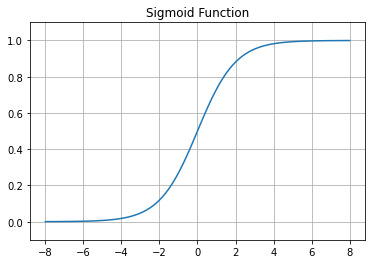

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-8,8,100)
plt.plot(x,sigmoid(x),label='sigmoid')
plt.grid()
plt.ylim([-0.1,1.1])
plt.title("Sigmoid Function")
plt.show()

ចំពោះទិន្នន័យ$\pmb{x}$ ក្នុងករណីដែលប្រូបាប$P\left(\hat{y}=1|\pmb{x}\right)>0.5 $នោះទិន្នន័យត្រូវបានទស្សន៍ទាយថាក្នុងចំណាត់ថ្នាក់ក្រុម$\hat{y}=1 $។ការកំណត់បែបនេះគឺសមមូលគ្នានឹងលក្ខខណ្ឌផលគុណស្កាលែវិជ្ជមានដែលបានបង្ហាញខាងដើម។

$$
P\left(\hat{y}=1|\pmb{x}\right)>0.5\Leftrightarrow\frac{1}{1+\exp{\left(-\pmb{x}^\top\pmb{w}\right)}}>\frac{1}{2}\ \Leftrightarrow\exp{\left(-\pmb{x}^\top\pmb{w}\right)}<1\ \Leftrightarrow\ \pmb{x}^\top\pmb{w}>0
$$


## កម្រិតសាកសមនៃទិន្នន័យ Likelihood

ឧបមាថា ប៉ារ៉ាម៉ែត្រនៃម៉ូឌែលតម្រែតម្រង់Logisticត្រូវបានកំណត់ដូចខាងក្រោម។ 

$$
\pmb{w}=\left(\begin{matrix}\begin{matrix}\begin{matrix}-2&1\\\end{matrix}&\begin{matrix}1&0\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}\begin{matrix}1&1\\\end{matrix}&\begin{matrix}-1&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)^\top
$$

ក្នុងករណីនេះ តម្លៃផលគុណស្កាលែរវាងវ៉ិចទ័រអថេរពន្យល់នៃទិន្នន័យ$ \pmb{x} $និងប៉ារ៉ាម៉ែត្រអាច
គណនានិងបកស្រាយជាទម្រង់ប្រូបាបដូចខាងក្រោម។

$$
\pmb{x}^\top\pmb{w}=\left(\begin{matrix}\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}1&1\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}0&1\\\end{matrix}&\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}0&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)\left(\begin{matrix}\begin{matrix}-2\\1\\\end{matrix}\\\vdots\\\begin{matrix}-1\\0\\\end{matrix}\\\end{matrix}\right)=3
$$

$$
P\left(\hat{y}=1|\pmb{x}\right)=\sigma\left(3\right)=\frac{1}{1+\exp{\left(-3\right)}}=0.95
$$

ចំពោះលទ្ធផលនេះយើងអាចបកស្រាយថា ចំពោះអត្ថបទសារដែលបានផ្តល់ ម៉ូឌែលបានប៉ាន់ស្មានថាជាspam mailដោយតម្លៃប្រូបាប0.95។តម្លៃនេះធំជាង0.5 ហេតុនេះយើងថាម៉ូឌែលទស្សន៍ទាយថាវាជាspam mail។

ក្នុងការពិភាក្សាខាងលើមកដល់ត្រឹមនេះ ចំពោះទិន្នន័យ$\pmb{x}$និងប៉ារ៉ាម៉ែត្រ$\pmb{w} $ ដែលត្រូវបានផ្តល់ឲ្យការប៉ាន់ស្មានរបស់ម៉ូឌែលត្រូវបានគណនាតាមវិធីដែលបានរៀបរាប់ខាងលើ។ ពេលនេះយើងពិនិត្យករណីដែលប្រភេទទិន្នន័យត្រូវបានកំណត់ជាក់លាក់ តែប៉ារ៉ាម៉ែត្រអាចត្រូវបានផ្លាស់ប្តូរ។ នៅទីនេះ យើងសិក្សាលើកម្រិតសាកសមនៃទិន្នន័យដែលម៉ូឌែលប៉ាន់ស្មានបានដោយកំណត់ជាតម្លៃប្រូបាប${\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)$ដូចខាងក្រោម និងសន្មតហៅថា កម្រិតសាកសម Likelihood។ពោលគឺកម្រិតដែលម៉ូឌែលអាចប៉ាន់ស្មានបានត្រឹមត្រូវ(គិតជាភាគរយ)លើប្រភេទទិន្នន័យនិមួយៗ។

$$
{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)=P\left(\hat{y}=y|\pmb{x}\right)
$$

ឧទាហរណ៍ក្នុងករណីអត្ថបទសារខាងលើ សន្មតថាប្រភេទទិន្នន័យពិតគឺ$y=1$ ។ចំពោះប៉ារ៉ាម៉ែត្រ$\pmb{w}$ ដែលត្រូវបានផ្តល់ឲ្យ ការប៉ាន់ស្មានរបស់ម៉ូឌែលខាងលើគឺ 

$$
P\left(\hat{y}=1|\pmb{x}\right)=0.95
$$
ហេតុនេះកម្រិតសាកសមLikelihood : 

$$
{\hat{l}}_{\left(\pmb{x},1\right)}\left(\pmb{w}\right)=P\left(\hat{y}=1|\pmb{x}\right)=0.95
$$

ដែលមានន័យថា ម៉ូឌែលអាចបែងចែកថាជាspam mailបានត្រឹមត្រូវក្នុងកម្រិត95%(ប្រូបាប0.95)។ ផ្ទុយទៅវិញ ឧបមាថាយើងមានអត្ថបទសារមិនមែនspam mail មួយផ្សេង “Please submit your assignment file by tomorrow morning” ។ នោះវ៉ិចទ័រ

$$
\pmb{x}=\left(\begin{matrix}\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}1&0\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}0&0\\\end{matrix}&\begin{matrix}\begin{matrix}0&0\\\end{matrix}&\begin{matrix}0&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)^\top 
$$

។

$$
\pmb{x}^\top\pmb{w}=\left(\begin{matrix}\begin{matrix}\begin{matrix}1&0\\\end{matrix}&\begin{matrix}1&0\\\end{matrix}\\\end{matrix}&\begin{matrix}\begin{matrix}0&0\\\end{matrix}&\begin{matrix}\begin{matrix}0&0\\\end{matrix}&\begin{matrix}0&0\\\end{matrix}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right)\left(\begin{matrix}\begin{matrix}-2\\1\\\end{matrix}\\\vdots\\\begin{matrix}-1\\0\\\end{matrix}\\\end{matrix}\right)=-1
$$

$$
P\left(\hat{y}=1|\pmb{x}\right)=\sigma\left(-1\right)=\frac{1}{1+\exp{\left(1\right)}}=0.27
$$

ដោយចម្លើយពិតគឺមិនមែនជាspam mail (y=0) ហេតុនេះកម្រិតសាកសមLikelihood : 

$$
{\hat{l}}_{\left(\pmb{x},0\right)}\left(\pmb{w}\right)=P\left(\hat{y}=0|\pmb{x}\right)=1-P\left(\hat{y}=1|\pmb{x}\right)=1-0.27=0.73 
$$

ដែលមានន័យថាម៉ូឌែលអាចបែងចែកថាមិនមែនspam mailបានត្រឹមត្រូវក្នុងកម្រិត73%(ប្រូបាប0.73)។

ចំពោះគ្រប់ប្រភេទទិន្នន័យ យើងអាចសរសេរកន្សោមកម្រិតសាកសមបានក្រោមទម្រង់

$$
{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)=P\left(\hat{y}=y|\pmb{x}\right)=\left\{\begin{matrix}
P(\hat{y}=1|x)& (y=1)\\ 
P(\hat{y}=0|x)& (y=0)
\end{matrix}\right.   =π^{y}(1-π)^{1-y}
$$

ដែល 

$$\pi=P\left(\hat{y}=1|\pmb{x}\right)=\sigma\left(\pmb{x}^\top\pmb{w}\right)$$

។


## ការប៉ាន់ស្មានមេគុណតម្រែតម្រង់តាម Maximum Likelihood

នៅក្នុងម៉ូឌែលតម្រែតម្រង់លីនេអ៊ែរ យើងបានកំណត់តម្លៃមេគុណតម្រែតម្រង់ដោយធ្វើអប្ប
បរមាកម្មលើតម្លៃកម្រិតលម្អៀងរវាងតម្លៃប៉ាន់ស្មានដោយម៉ូឌែលនិងតម្លៃពិតប្រាកដនៃអថេរគោលដៅ។ស្រដៀងគ្នានេះ ក្នុងម៉ូឌែលតម្រែតម្រង់Logistic យើងអាចកំណត់តម្លៃនៃប៉ារ៉ាម៉ែត្ររបស់ម៉ូឌែលដោយធ្វើអតិបរមាកម្មលើកម្រិតសាកសករបស់ទិន្នន័យដែលម៉ូឌែលអាចប៉ាន់ស្មានបាន។ វិធីសាស្រ្តនេះត្រូវបានគេហៅថា Maximum Likelihood Estimation(MLE)។

ចំពោះសំណុំទិន្នន័យទាំងអស់$\mathcal{D}$ដែលមានចំនួន$N$ យើងកំណត់កម្រិតសាកសមនៃទិន្នន័យ(likelihood)ពោលគឺកម្រិតដែលម៉ូឌែលអាចប៉ាន់ស្មានបានត្រឹមត្រូវចំពោះគ្រប់ទិន្នន័យទាំងអស់ដោយកន្សោមខាងក្រោម។ នៅទីនេះយើងសន្មតថារបាយនៃគ្រប់ទិន្នន័យទាំងអស់គឺឯករាជ្យនិងមានឯកសណ្ឋានភាព(i.i.d : independent and identically dristributed)។

$$
{\hat{L}}_\mathcal{D}\left(\pmb{w}\right)=\prod_{i=1}^{N}{{\hat{l}}_{\left(\pmb{x}_i,y_i\right)}\left(\pmb{w}\right)}
$$

ដោយសារ កម្រិតសាកសមនៃទិន្នន័យ(likelihood)គឺជាតម្លៃប្រូបាប ហេតុនេះតម្លៃរបស់វាតូចខ្លាំង ដែលធ្វើឱ្យតម្លៃផលគុណកាន់តែតូចខ្លាំងពេលចំនួនទិន្នន័យមានច្រើន។ ដើម្បីបញ្ចៀសនូវបញ្ហាតម្លៃតូចពេកក្នុងការគណនាជាមួយកុំព្យូទ័រ នៅទីនេះយើងសិក្សាបរមាកម្មលើតម្លៃលោការីតរបស់វា។ ការធ្វើបែបនេះមិនប៉ះពាល់ដល់ការធ្វើបរមាកម្មឡើយ ព្រោះអនុគមន៍លោការីតជាអនុគមន៍កើនដាច់ខាត។

$$
\log{{\hat{L}}_\mathcal{D}\left(\pmb{w}\right)}=\log{\prod_{i=1}^{N}{{\hat{l}}_{\left(\pmb{x}_i,y_i\right)}\left(\pmb{w}\right)}}=\sum_{i=1}^{N}\log{{\hat{l}}_{\left(\pmb{x}_i,y_i\right)}\left(\pmb{w}\right)}
$$

ដើម្បីងាយស្រួលក្នុងការដោះស្រាយបញ្ហាបរមាកម្ម យើងប្តូរពីការធ្វើអតិបរមាកម្មលើLikelihood ទៅជាការធ្វើអប្បបរមាកម្មដោយគុណកន្សោមខាងលើ -1 ។ 

$$
{\hat{\mathcal{L}}}_\mathcal{D}\left(\pmb{w}\right)=-\log{{\hat{L}}_\mathcal{D}\left(\pmb{w}\right)}=-\sum_{i=1}^{N}\log{{\hat{l}}_{\left(\pmb{x}_i,y_i\right)}\left(\pmb{w}\right)}
$$

ក្នុងករណីយើងចង់សិក្សាបន្ថែមដោយបញ្ចូលផ្នែក Regularization (Ridge) ចូលក្នុងម៉ូឌែល Likehoodដែលត្រូវធ្វើបរមាកម្ម អាចប្តូរទៅសរសេរជាទម្រង់ខាងក្រោម។

$$
{\hat{\mathcal{L}}}_\mathcal{D}\left(\pmb{w}\right)=-\log{{\hat{L}}_\mathcal{D}\left(\pmb{w}\right)}+\alpha\left||\pmb{w}|\right|_2^2=-\sum_{i=1}^{N}\log{\hat{l}_{(x_i,y_i)}w}+α\left||w|\right|_2^2   　(α>0)
$$


## ការដោះស្រាយតាមរយៈវិធី SGD

ដើម្បីធ្វើអប្បបរមាកម្ម${\hat{\mathcal{L}}}_\mathcal{D}\left(\pmb{w}\right) $យើងនឹងប្រើប្រាស់វិធីSGDដែលបានសិក្សាក្នុងអត្ថបទមុន។
ជាដំបូងយើងពិនិត្យលើអនុគមន៍ដេរីវេ $\frac{\partial}{\partial\pmb{w}}\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)} $។ 

$$
\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}=\log{\left(\pi^y\left(1-\pi\right)^{1-y}\right)}=y\log{\pi}+\left(1-y\right)\log{\left(1-\pi\right)}
$$

$$
\frac{\partial}{\partial\pmb{w}}\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}=\frac{y}{\pi}\frac{\partial\pi}{\partial\pmb{w}}+\frac{1-y}{1-\pi}\times\left(-\frac{\partial\pi}{\partial\pmb{w}}\right)=\frac{y-\pi}{\pi\left(1-\pi\right)}\frac{\partial\pi}{\partial\pmb{w}}
$$

បន្ទាប់ពីនេះ ដើម្បីគណនា $\frac{\partial\pi}{\partial\pmb{w}}$ យើងពិនិត្យលើដេរីវេនៃអនុគមន៍Sigmoid។

$$
\frac{\partial}{\partial a}\sigma\left(a\right)=\frac{\partial}{\partial a}\left\{\frac{1}{1+\exp{\left(-a\right)}}\right\}=-\frac{\frac{\partial}{\partial a}\exp{\left(-a\right)}}{\left(1+\exp{\left(-a\right)}\right)^2}=\frac{1}{1+\exp{\left(-a\right)}}\times\frac{\exp{\left(-a\right)}}{1+\exp{\left(-a\right)}}
$$

$$
\frac{\partial}{\partial a}\sigma\left(a\right)=\sigma\left(a\right)\left(1-\sigma\left(a\right)\right)
\frac{\partial\pi}{\partial\pmb{w}}=\frac{\partial}{\partial\pmb{w}}P\left(\hat{y}=1|\pmb{x}\right)=\frac{\partial}{\partial\pmb{w}}\sigma\left(\pmb{x}^\top\pmb{w}\right)=\sigma\left(\pmb{x}^\top\pmb{w}\right)\left(1-\sigma\left(\pmb{x}^\top\pmb{w}\right)\right)=\pi\left(1-\pi\right)
$$

នៅទីនេះ
$$
a=\pmb{x}^\top\pmb{w}\ ,\ \frac{\partial a}{\partial\pmb{w}}=\frac{\partial}{\partial\pmb{w}}\left(\pmb{x}^\top\pmb{w}\right)=\pmb{x}
$$

ហេតុនេះ

$$
\frac{\partial}{\partial\pmb{w}}\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}=\frac{y-\pi}{\pi\left(1-\pi\right)}\frac{\partial\pi}{\partial\pmb{w}}=\frac{y-\pi}{\pi\left(1-\pi\right)}\frac{\partial\pi}{\partial a}\frac{\partial a}{\partial\pmb{w}}=\frac{y-\pi}{\pi\left(1-\pi\right)}\pi\left(1-\pi\right)\pmb{x}
$$

$$
\frac{\partial}{\partial\pmb{w}}\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}=\left(y-\pi\right)\pmb{x}
$$

ដូចនេះ តាមរយៈវិធីSGD តម្លៃនៃប៉ារ៉ាម៉ែត្រ$ \pmb{w} $ដែលធ្វើបរមាកម្មលើតម្លៃកម្រិតសាកសមនៃទិន្នន័យត្រូវបានគណនាដោយផ្លាស់ប្តូរតម្លៃដូចខាងក្រោម។

$$
\pmb{w}^{\left(t+1\right)}=\pmb{w}^{\left(t\right)}-\eta_t\left.\frac{\partial}{\partial\pmb{w}}\left\{-\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}\right\}\right|_{\pmb{w}=\pmb{w}^{\left(\pmb{t}\right)}}
$$

$$
\pmb{w}^{\left(t+1\right)}=\pmb{w}^{\left(t\right)}+\eta_t\left.\frac{\partial}{\partial\pmb{w}}\log{{\hat{l}}_{\left(\pmb{x},y\right)}\left(\pmb{w}\right)}\right|_{\pmb{w}=\pmb{w}^{\left(\pmb{t}\right)}}
$$

$$
\pmb{w}^{\left(t+1\right)}=\pmb{w}^{\left(t\right)}+\eta_t\left(y-\pi^{\left(t\right)}\right)\pmb{x}
$$

នៅទីនេះ $\pi^{\left(t\right)}$ ជាតម្លៃប្រូបាបដែលគណនាដោយម៉ូឌែលជាមួយតម្លៃប៉ារ៉ាម៉ែត្រនៅដំណាក់កាល$t$ នៃការផ្លាស់ប្តូរតម្លៃប៉ារ៉ាម៉ែត្រ ពោលគឺ $\pi^{\left(t\right)}=\sigma\left(\pmb{x}^\top\pmb{w}^{\left(t\right)}\right)$។$ \eta_t$ ជាlearning-rate និង $y $ជាចំណាត់ថ្នាក់ក្រុមពិតប្រាកដនៃទិន្នន័យ$\pmb{x}$។

ក្នុងករណីប្រើRidge Regularization កន្សោមខាងលើនឹងប្រែទៅជាទម្រង់ខាងក្រោម។

$$
\pmb{w}^{\left(t+1\right)}=\left(1-\frac{2\alpha\eta_t}{N}\right)\pmb{w}^{\left(t\right)}+\eta_t\left(y-\pi^{\left(t\right)}\right)\pmb{x}
$$

## ការវាយតម្លៃ

កាលពីសិក្សាម៉ូឌែលតម្រែតម្រង់លីនេអ៊ែរ យើងវាយតម្លៃម៉ូឌែលតាមរយៈតម្លៃកម្រិតលម្អៀង ឬ 
មេគុណR^2 ។ នៅករណីម៉ូឌែលLogisticចំពោះបញ្ហាចំណាត់ថ្នាក់ក្រុមនេះ យើងអាចវាយតម្លៃតាមរយៈតម្លៃLikelihood បាន។ ប៉ុន្តែការសិក្សាលើតម្លៃLikelihood មានការពិបាកក្នុងការបកស្រាយភ្ជាប់នឹងជីវភាពរស់នៅរបស់យើង។ហេតុនេះក្នុងបញ្ហាចំណាត់ថ្នាក់ក្រុមរង្វាស់សម្រាប់រង្វាយតម្លៃលើម៉ូឌែលត្រូវបានគណនាដូចខាងក្រោម។

|  	| $y=1$ 	| $y=0$ 	| Total 	|
|-	|-	|-	|-	|
| $\hat{y}=1$ 	| TP<br>(true positive) 	| FP<br>(false positive) 	| ចំនួនករណីដែលត្រូវបានទស្សន៍ទាយថា$\hat{y}=1$       	|
| $\hat{y}=0$ 	| FN<br>(false negative) 	| TN<br>(true negative) 	| ចំនួនករណីដែលត្រូវបានទស្សន៍ទាយថា$\hat{y}=0$       	|
| Total 	| ចំនួនទិន្នន័យ$y=1$     	| ចំនួនទិន្នន័យ$y=0$     	| ចំនួនទិន្នន័យសរុប      	|

Accuracyគឺបង្ហាញពីអត្រានៃការទស្សន៍ទាយបានត្រឹមត្រូវរបស់ម៉ូឌែលដោយមិនបែងចែកចំណាត់ថ្នាក់ក្រុមរបស់ទិន្នន័យ។អត្រានេះដូចគ្នានិងពិន្ទុដែលអ្នកឆ្លើយសំណួរបានត្រឹមត្រូវក្នុងការប្រឡងណាមួយដែរ។ 

Precisionគឺសំដៅដល់អត្រានៃករណីដែលពិតជានៅក្នុងក្រុម$ y=1 $មែនក្នុងចំណោមករណីដែលម៉ូឌែលបានទស្សន៍ទាយថាស្ថិតក្នុងក្រុម$y=1$។ Recallសំដៅដល់អត្រានៃករណីដែលម៉ូឌែលបានទស្សន៍ទាយថាស្ថិតក្នុងក្រុម$y=1$ ក្នុងចំណោមទិន្នន័យក្នុងក្រុម$y=1$សរុប។

ជាទូទៅវាជាការលំបាកក្នុងការបង្កើតម៉ូឌែលដែលមានទាំងPrecisionនិងRecallខ្ពស់ដូចគ្នា(trade-off relation)។ហេតុនេះដើម្បីវាយតម្លៃរួមលើរង្វាស់ទាំងពីរនេះការធ្វើផលធៀបមធ្យមលើតម្លៃទាំងពីរត្រូវបានប្រើពោលគឺតម្លៃ F1-score។


## អនុវត្តលើការធ្វើចំណាត់ថ្នាក់ពីរក្រុម : spam mail classification

In [5]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### រៀបចំទិន្នន័យ

យើងទាញយក Dataset ពី https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2021-02-20 11:28:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip


Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... 

connected.


HTTP request sent, awaiting response... 

200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip.9’

smsspamcollection.z   0%[                    ]       0  --.-KB/s               

smsspamcollection.z  11%[=>                  ]  23.50K  56.4KB/s               

smsspamcollection.z  27%[====>               ]  54.50K  73.2KB/s               

smsspamcollection.z  43%[=======>            ]  85.50K  84.9KB/s               

smsspamcollection.z  58%[==========>         ] 116.50K  91.5KB/s               

smsspamcollection.z  74%[=============>      ] 147.50K  95.7KB/s               

smsspamcollection.z  89%[================>   ] 178.50K  98.6KB/s               

smsspamcollection.z 100%[===================>] 198.65K   102KB/s    in 1.9s    

2021-02-20 11:28:52 (102 KB/s) - ‘smsspamcollection.zip.9’ saved [203415/203415]



In [7]:
!unzip smsspamcollection.zip


Archive:  smsspamcollection.zip
replace SMSSpamCollection? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
!head SMSSpamCollection

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

spam $\to$ y=1

ham  $\to$ y=0

In [12]:
def tokenize(s):
    tokens = s.split(' ')
    return [t.rstrip('.') for t in tokens]

D = []

with open('SMSSpamCollection') as fi:
    for line in fi:
        fields = line.strip('\n').split('\t')
        x = tokenize(fields[1])
        y = 1 if fields[0] == 'spam' else 0
        D.append((x, y))

print("Number of data N=",len(D))
print("Example:",D[10])

Number of data N= 5574
Example: (["I'm", 'gonna', 'be', 'home', 'soon', 'and', 'i', "don't", 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight,', 'k?', "I've", 'cried', 'enough', 'today'], 0)


រៀបចំទិន្នន័យសម្រាប់កំណត់ប៉ារ៉ាម៉ែត្រម៉ូឌែល(training data) និងសម្រាប់វាយតម្លៃ(test data)

In [13]:
import random
random.shuffle(D)
Dtrain = D[:5000]
Dtest = D[5000:]

### Logistic Regression Model with Python

កំណត់តម្លៃដំបូងនៃប៉ារ៉ាម៉ែត្ររបស់ម៉ូឌែលដោយ 0. គ្រប់កំប៉ូសង់របស់វា

In [14]:
W = {}
for x, y in Dtrain:
    for a in x:
        W.setdefault(a, 0.)

In [15]:
def score(W, x):
  score_ = 0.
  for a in x:
    score_ += W.get(a, 0.)
  return score_

In [16]:
def sigmoid(a):
    if 0 <= a:
        return 1 / (1 + math.exp(-a))
    else:
        return 1. - 1 / (1 + math.exp(a))

កំណត់តម្លៃប៉ារ៉ាម៉ែត្រដោយប្រើ SGD 

In [17]:
eta = 0.1
for t in range(1000):
    loss = 0.
    for x, y in Dtrain:
        pi = sigmoid(score(W, x))
        for a in x:
            W[a] += eta * (y - pi)

ប្រើ Accuracy ជារង្វាស់សម្រាប់វាយតម្លៃម៉ូឌែល

In [18]:
def accuracy(W, Dtest):
    n = 0
    for x, y in Dtest:
      if score(W, x) > 0:
        n += y
      else:
        n += 1-y
    return n / len(Dtest)

In [19]:
accuracy(W, Dtest)

0.9616724738675958

កំណត់ពាក្យដែលពិបាក និង ងាយស្រួល កំណត់សម្គាល់ spam mail តាមរយៈតម្លៃនៃប៉ារ៉ាម៉ែត្រ

In [24]:
F = sorted(W.items(), key=lambda x:x[1])


ពាក្យដែលងាយមិនងាយសម្គាល់បានថាជា​ spam mail

In [25]:
F[:20]

[('Ok', -7.850464149800363),
 ('Yup', -6.647303189499743),
 ('Okie', -6.552620472841572),
 ('Then', -5.201949865544912),
 ('Where', -5.077692135719686),
 ('i', -5.07408731777865),
 ('later', -4.986244586221465),
 ('Thanx', -4.843196321039564),
 ("I'll", -4.809736559030836),
 ('So', -4.773825570502229),
 ('me', -4.765978598518484),
 ('him', -4.760745409151684),
 ('Anything', -4.7282829394267685),
 ('My', -4.652138035258698),
 ('Lmao!nice', -4.629257904623003),
 ('Waiting', -4.606084581075299),
 ('Anytime', -4.605794986139529),
 ('ALRITE', -4.582996285974457),
 ('Have', -4.572928829153986),
 ('Nite', -4.572050717229812)]

ពាក្យដែលងាយងាយស្រួលក្នុងការសម្គាល់បានថាជា​ spam mail

In [26]:
F[-20:]

[('service', 4.077551196993116),
 ('Reply', 4.166776285628135),
 ('chat,', 4.239368657443364),
 ('To', 4.251458053219325),
 ('sexy?', 4.2516509960549165),
 ('look', 4.327654265491161),
 ('claim', 4.431248857833612),
 ('truly', 4.463883231380166),
 ('darling', 4.5044661596449584),
 ('mobile', 4.597679069869247),
 ('Call', 4.951530371819616),
 ('STOP', 5.068454928272032),
 ('txt', 5.284078476481917),
 ('07090201529', 5.385284517641132),
 ('Text', 5.7351749570158574),
 ('won', 5.849502227945829),
 ('&', 5.936203404287587),
 ('Txt', 6.245675586789368),
 ('Luv', 6.512096774166162),
 ("let's", 6.867920108687071)]